## Corner Detection
Looking for corners in image.

**What is a corner?**
A corner can be interpreted as the junction of two edges, where an edge is an sudden change in image brightness.

* There are various corner detection.
* We will take a look at some of the most popular algorithms:
    * Harris Corner Detection
    * Shi-Tomasi Corner Detection
    
**Harris Corner Detection**

* Published in 1988 by Chris Harris and Mike Stephen.
* The basic intuition is that corners can be detected by looking for significant change in all directions.

**Shi-Tomasi Corner Detection**

* Published in 1994 by J.Shi and C.Tomasi in their paper Good feature to track
* It made a small modification to the Harris Corner Detection which ended up with better results

In [1]:
# Import all the tools
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

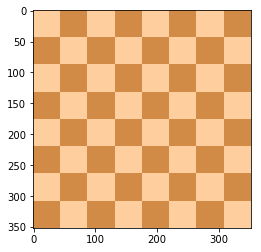

In [2]:
# Import flat chess image
flat_chess=cv2.imread("flat_chessboard.png")
flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_chess=cv2.cvtColor(flat_chess,cv2.COLOR_RGB2GRAY)

plt.imshow(flat_chess)

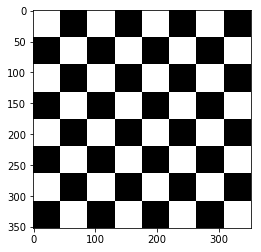

In [3]:
plt.imshow(gray_chess,cmap='gray')

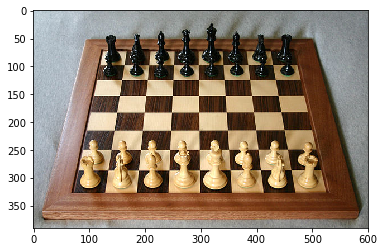

In [4]:
# Image of the real chess 
real_chess=cv2.imread("real_chessboard.jpg")
real_chess=cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
real_gray=cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)
plt.imshow(real_chess)

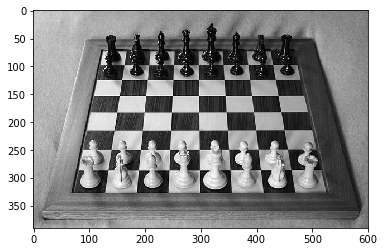

In [5]:
plt.imshow(real_gray,cmap='gray')

In [6]:
# Convert image dtype of image from int to dtype because corner detection needs float values
gray=np.float32(gray_chess)

In [7]:
gray

array([[215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       ...,
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.]], dtype=float32)

## Harris Corner Detection
**cornerHarris Function**

*  src Input single-channel 8-bit or floating-point image.
*  dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
*  blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs ).
*  ksize Aperture parameter for the Sobel operator.
*  k Harris detector free parameter. See the formula in DocString
*  borderType Pixel extrapolation method. See #BorderTypes.

In [9]:
dst=cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [10]:
dst=cv2.dilate(dst,None)

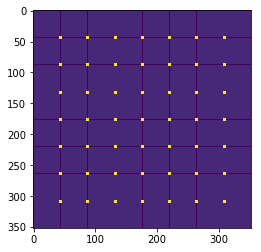

In [11]:
plt.imshow(dst)

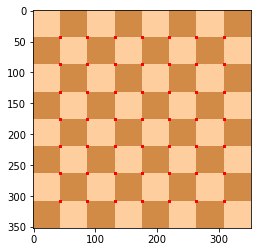

In [12]:
# For better visualization
flat_chess[dst>0.01*dst.max()]=[255,0,0]
plt.imshow(flat_chess)

### Let's find corners in the real chess image


In [13]:
real_gray=np.float32(real_gray)

In [14]:
real_gray

array([[206., 200., 198., ..., 118., 118., 123.],
       [199., 196., 195., ..., 117., 115., 116.],
       [209., 210., 208., ..., 129., 127., 127.],
       ...,
       [120., 131., 144., ..., 116., 120., 119.],
       [124., 143., 153., ..., 112., 113., 108.],
       [135., 155., 156., ..., 114., 114., 107.]], dtype=float32)

In [21]:
dst1=cv2.cornerHarris(real_gray,2,3,0.04)

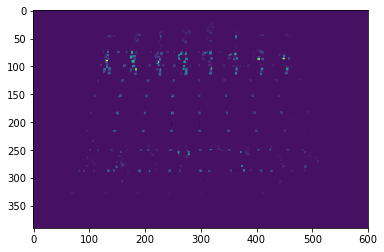

In [22]:
dst1=cv2.dilate(dst1,None)
plt.imshow(dst1)

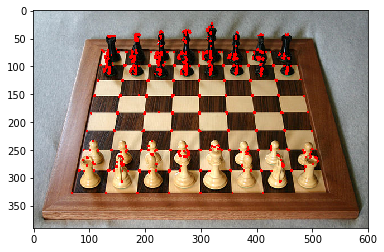

In [23]:
# For better visualization
real_chess[dst1>0.01*dst1.max()]=[255,0,0]
plt.imshow(real_chess);

## Shi-Tomasi Corner Detection method

goodFeatureToTrack Function Parameters

* image Input 8-bit or floating-point 32-bit, single-channel image.
* corners Output vector of detected corners.
* maxCorners Maximum number of corners to return. If there are more corners than are found,the strongest of them is returned. `maxCorners <= 0` implies that no limit on the maximum is set and all detected corners are returned.
* qualityLevel Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue (see #cornerMinEigenVal ) or the Harris function response (see #cornerHarris ). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the qualityLevel=0.01 , then all the corners with the quality measure less than 15 are rejected.

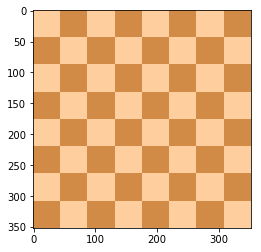

In [3]:
# Import images and convert them into rbg and gray scale color channels

flat_chess=cv2.imread("flat_chessboard.png")
flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_RGB2GRAY)
plt.imshow(flat_chess);

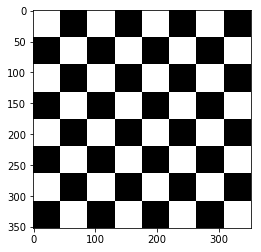

In [4]:
plt.imshow(gray_flat_chess,cmap='gray');

In [5]:
corners=cv2.goodFeaturesToTrack(gray_flat_chess,60,0.01,10) # (src,max no. of corners,qualityLevel,min distance)

In [6]:
corners

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]],

       [[132., 308.]],

       [[ 88., 308.]],

       [[ 44., 308.]],

       [[308., 264.]],

       [[264., 264.]],

       [[220., 264.]],

       [[176., 264.]],

       [[132., 264.]],

       [[ 88., 264.]],

       [[ 44., 264.]],

       [[308., 220.]],

       [[264., 220.]],

       [[220., 220.]],

       [[176., 220.]],

       [[132., 220.]],

       [[ 88., 220.]],

       [[ 44., 220.]],

       [[308., 176.]],

       [[264., 176.]],

       [[220., 176.]],

       [[176., 176.]],

       [[132., 176.]],

       [[ 88., 176.]],

       [[ 44., 176.]],

       [[308., 132.]],

       [[264., 132.]],

       [[220., 132.]],

       [[176., 132.]],

       [[132., 132.]],

       [[ 88., 132.]],

       [[ 44., 132.]],

       [[308.,  88.]],

       [[264.,  88.]],

       [[220.,  88.]],

       [[176.,  88.]],

       [[132.,  88.]],

       [[ 88.,  88.]],

       [[ 44.,  

In [30]:
corners=np.int0(corners)   # Convert to int dtype
corners

array([[[308, 308]],

       [[264, 308]],

       [[220, 308]],

       [[176, 308]],

       [[132, 308]],

       [[ 88, 308]],

       [[ 44, 308]],

       [[308, 264]],

       [[264, 264]],

       [[220, 264]],

       [[176, 264]],

       [[132, 264]],

       [[ 88, 264]],

       [[ 44, 264]],

       [[308, 220]],

       [[264, 220]],

       [[220, 220]],

       [[176, 220]],

       [[132, 220]],

       [[ 88, 220]],

       [[ 44, 220]],

       [[308, 176]],

       [[264, 176]],

       [[220, 176]],

       [[176, 176]],

       [[132, 176]],

       [[ 88, 176]],

       [[ 44, 176]],

       [[308, 132]],

       [[264, 132]],

       [[220, 132]],

       [[176, 132]],

       [[132, 132]],

       [[ 88, 132]],

       [[ 44, 132]],

       [[308,  88]],

       [[264,  88]],

       [[220,  88]],

       [[176,  88]],

       [[132,  88]],

       [[ 88,  88]],

       [[ 44,  88]],

       [[308,  44]],

       [[264,  44]],

       [[220,  44]],

       [[1

In [31]:
for i in corners:
    x,y=i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)

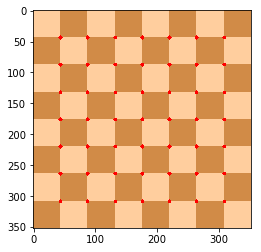

In [33]:
plt.imshow(flat_chess);

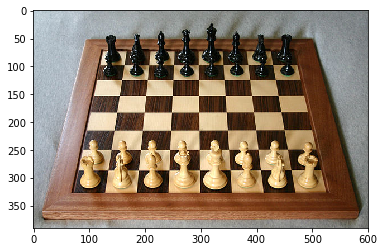

In [34]:
# Now let's do this for real chess image
real_chess=cv2.imread("real_chessboard.jpg")
real_chess=cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_chess=cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)
plt.imshow(real_chess);

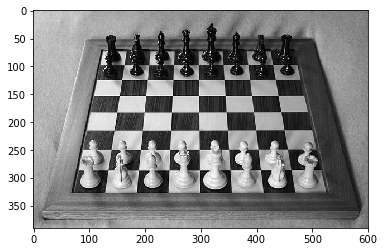

In [36]:
plt.imshow(gray_chess,cmap='gray');

In [49]:
corners1=cv2.goodFeaturesToTrack(gray_chess,200,0.01,10)
corners1=np.int0(corners1)

In [50]:
for i in corners1:
    x,y=i.ravel()
    cv2.circle(real_chess,(x,y),3,(255,0,0),-1)
    

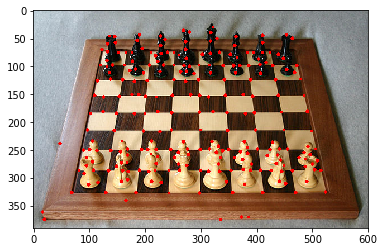

In [52]:
plt.imshow(real_chess);